In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import random

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Activation
from keras.datasets import cifar10

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# load CIFAR
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_classes = 10

# reshape CIFAR
# x_train = x_train.reshape(50000, 32*32*3)
# x_test = x_test.reshape(10000, 32*32*3)

# make float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize to (0-1)
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('%d train samples, %d test samples'%(x_train.shape[0], x_test.shape[0]))
print("training data shape: ", x_train.shape, y_train.shape)
print("test data shape: ", x_test.shape, y_test.shape)

50000 train samples, 10000 test samples
training data shape:  (50000, 32, 32, 3) (50000, 10)
test data shape:  (10000, 32, 32, 3) (10000, 10)


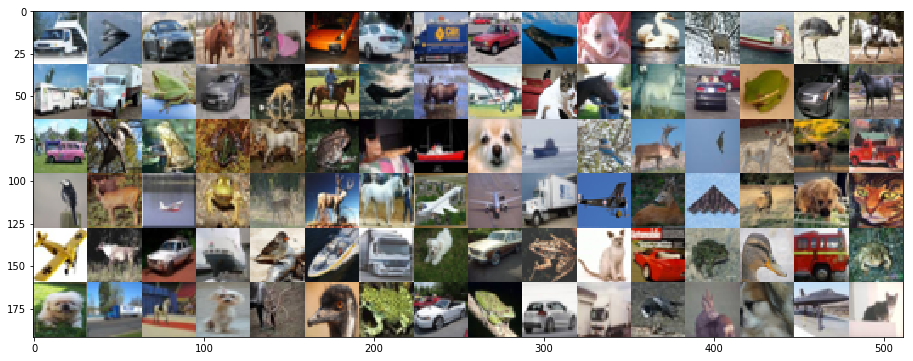

In [3]:
samples = np.concatenate([np.concatenate([x_train[i].reshape((32,32,3)) for i in [int(random.random() * len(x_train)) for i in range(16)]], axis=1) for i in range(6)], axis=0)
plt.figure(figsize=(16,6))
plt.imshow(samples, cmap='gray')

In [3]:
from keras.models import load_model
model = load_model('CIFAR10-EP97-ACC0.8526.h5')
y_actual_list = cifar10.load_data()[1][1]
target_string =  np.array(['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])

In [4]:
import os
import time,datetime
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from keras.preprocessing.image import ImageDataGenerator

def train(model, batch, epoch, data_augmentation=True):
    start = time.time()
    log_dir = datetime.time().strftime('model_%Y%m%d_%H%M')
    os.mkdir(log_dir)
    
    es = EarlyStopping(monitor='val_acc', patience=20)
    mc = ModelCheckpoint(log_dir + '\\CIFAR10-EP{epoch:02d}-ACC{val_acc:.4f}.h5', 
                         monitor='val_acc', save_best_only=True)
    tb = TensorBoard(log_dir=log_dir, histogram_freq=0)
    
    if data_augmentation:
        aug = ImageDataGenerator(width_shift_range = 0.125, height_shift_range = 0.125, horizontal_flip = True)
        aug.fit(x_train)
        gen = aug.flow(x_train, y_train, batch_size=batch)
        h = model.fit_generator(generator=gen, 
                                 steps_per_epoch=50000/batch, 
                                 epochs=epoch, 
                                 validation_data=(x_test, y_test),
                                 callbacks=[es, mc, tb])
    else:
        start = time()
        h = model.fit(x=x_train, 
                      y=y_train, 
                      batch_size=batch, 
                      epochs=epoch, 
                      validation_data=(x_test, y_test),
                      callbacks=[es, mc, tb])
    
    print('\n@ Total Time Spent: %.2f seconds' % (time.time() - start))
    acc, val_acc = h.history['acc'], h.history['val_acc']
    m_acc, m_val_acc = np.argmax(acc), np.argmax(val_acc)
    print("@ Best Training Accuracy: %.2f %% achieved at EP #%d." % (acc[m_acc] * 100, m_acc + 1))
    print("@ Best Testing Accuracy: %.2f %% achieved at EP #%d." % (val_acc[m_val_acc] * 100, m_val_acc + 1))
    return h

In [5]:
train(model, 128, 100, True)

model.save('my_model.h5') 

Epoch 1/100
391/390 [==============================] - 15s 38ms/step - loss: 0.3652 - acc: 0.8748 - val_loss: 0.5580 - val_acc: 0.8241
Epoch 2/100
391/390 [==============================] - 13s 34ms/step - loss: 0.3640 - acc: 0.8769 - val_loss: 0.4833 - val_acc: 0.8456
Epoch 3/100
391/390 [==============================] - 13s 34ms/step - loss: 0.3569 - acc: 0.8792 - val_loss: 0.4876 - val_acc: 0.8449
Epoch 4/100
391/390 [==============================] - 13s 34ms/step - loss: 0.3558 - acc: 0.8787 - val_loss: 0.5303 - val_acc: 0.8325
Epoch 5/100
391/390 [==============================] - 13s 34ms/step - loss: 0.3497 - acc: 0.8822 - val_loss: 0.4956 - val_acc: 0.8445
Epoch 6/100
391/390 [==============================] - 13s 34ms/step - loss: 0.3484 - acc: 0.8816 - val_loss: 0.5046 - val_acc: 0.8423
Epoch 7/100
391/390 [==============================] - 13s 34ms/step - loss: 0.3399 - acc: 0.8820 - val_loss: 0.4511 - val_acc: 0.8554
Epoch 8/100
391/390 [==============================] - 

In [7]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Training loss:', score[0])
print('Training accuracy:', score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Training loss: 0.2621692417645454
Training accuracy: 0.90828
Test loss: 0.45823808817863465
Test accuracy: 0.8526


4539
(10,)
predicted = 8, actual = 8


Text(0.5,1,'ship')

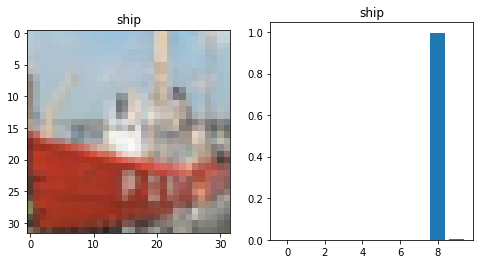

In [16]:
rdm = int(random.random()*10000)
print(rdm)

x_sample = x_test[rdm].reshape(1,32,32,3)
y_prob = model.predict(x_sample)[0]
print(y_prob.shape)
y_pred = y_prob.argmax()

print("predicted = %d, actual = %d" % (y_pred, y_actual_list[rdm]))

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(x_test[rdm])
plt.title(target_string[y_pred])

plt.subplot(1,2,2)
plt.bar(range(10), y_prob)
plt.title(target_string[y_pred])